In [1]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import show, output_notebook, push_notebook, export_png


In [64]:
train = {}
test = {}
valid = {}

with open('../data/proteins.train.txt', 'r') as f:
    for line in f.readlines():
        for word in line.split():
            train[word] = train.get(word, 0) + 1

N = sum(train.values())
train = {w: c/N for w, c in train.items()}

with open('../data/proteins.test.txt', 'r') as f:
    for line in f.readlines():
        for word in line.split():
            test[word] = test.get(word, 0) + 1
N = sum(test.values())
test = {w: c/N for w, c in test.items()}

with open('../data/proteins.val.txt', 'r') as f:
    for line in f.readlines():
        for word in line.split():
            valid[word] = valid.get(word, 0) + 1
N = sum(valid.values())
valid = {w: c/N for w, c in valid.items()}            

In [84]:
import pandas as pd

df = pd.DataFrame.from_dict(train, orient='index')
df.columns = ['train']
df['test'] = test.values()
df['valid'] = valid.values()

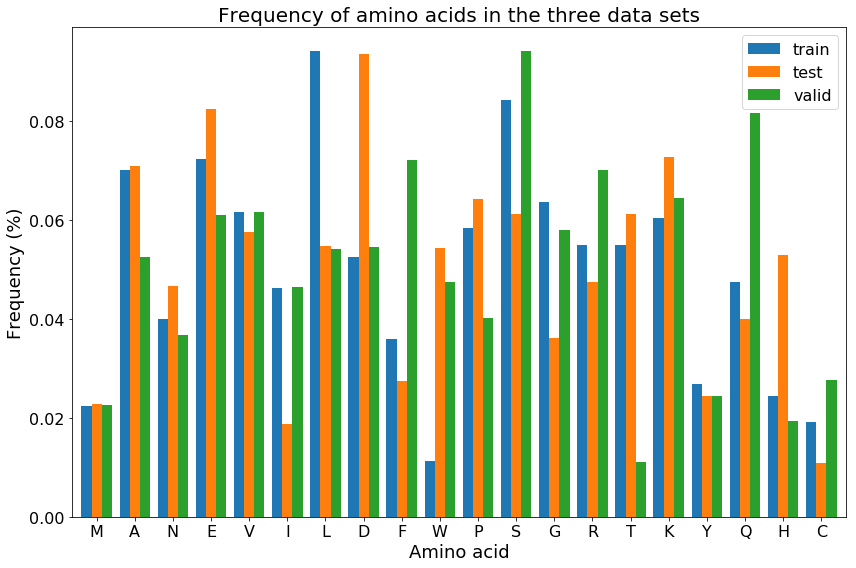

In [133]:
df.plot(kind='bar', stacked=False, width=0.8, figsize=(12,8))
plt.xlabel('Amino acid', size=18)
plt.ylabel('Frequency (%)', size=18)
plt.xticks(rotation='horizontal', size=16)
plt.yticks(size=16)
plt.legend(prop={'size': 16})
plt.title("Frequency of amino acids in the three data sets", fontsize=20)
plt.tight_layout()
plt.savefig('../fig/aa_freqs.png')